In [1]:
using DataFrames, CSV, RDa
using Statistics

In [6]:
filename = "./datasets/student-mat.csv"
df0 = DataFrame(CSV.File(filename))
df0[1:5,:]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob
,String3,String1,Int64,String1,String3,String1,Int64,Int64,String15,String15
1,GP,F,18,U,GT3,A,4,4,at_home,teacher
2,GP,F,17,U,GT3,T,1,1,at_home,other
3,GP,F,15,U,LE3,T,1,1,at_home,other
4,GP,F,15,U,GT3,T,4,2,health,services
5,GP,F,16,U,GT3,T,3,3,other,other


In [10]:
grades = df0[[:G1, :G2, :G3]]
head(grades)

,G1,G2,G3
,Int64,Int64,Int64
1,5,6,6
2,5,5,6
3,7,8,10
4,15,14,15
5,6,10,10
6,15,15,15


#  Boston Datasets

In [2]:
filename = "./datasets/Boston.csv"
df = DataFrame(CSV.File(filename))
df[1:5,:]

,Column1,crim,zn,indus,chas,nox,rm,age,dis,rad
,Int64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64
1,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1
2,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2
3,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2
4,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3
5,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3


In [3]:
names(df)

15-element Vector{String}:
 "Column1"
 "crim"
 "zn"
 "indus"
 "chas"
 "nox"
 "rm"
 "age"
 "dis"
 "rad"
 "tax"
 "ptratio"
 "black"
 "lstat"
 "medv"

In [4]:
name_of_y = :medv
names_of_x = [:rm, :ptratio, :lstat]
names_of_z = [:rad, :chas]

2-element Vector{Symbol}:
 :rad
 :chas

In [7]:
dfy = df[!, name_of_y]
dfX = df[!, names_of_x]
dfZ = df[!, names_of_z]
head(dfZ)

LoadError: UndefVarError: head not defined

In [145]:
dft = DataFrame(randn(500,2), :auto)

,x1,x2
,Float64,Float64
1,0.263919,0.814072
2,-1.03512,1.25373
3,-0.815591,-0.345523
4,-0.594139,-0.936824
5,0.191646,-0.975697
6,-0.0964613,0.868968
7,0.255583,1.23312
8,0.0807954,-1.16969
9,0.46921,-0.315457


# GLM fitting

In [6]:
using GLM

┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1317


In [8]:
formula = Term(name_of_y) ~ sum([Term(x) for x in names_of_x])

FormulaTerm
Response:
  medv(unknown)
Predictors:
  rm(unknown)
  ptratio(unknown)
  lstat(unknown)

In [78]:
model = glm(formula, df, )

LoadError: MethodError: no method matching fit(::Type{GeneralizedLinearModel}, ::Matrix{Float64}, ::Vector{Float64})
[0mClosest candidates are:
[0m  fit(::Type{M}, ::Union{Matrix{T}, SparseArrays.SparseMatrixCSC{T, Ti} where Ti<:Integer}, ::AbstractVector{var"#s57"} where var"#s57"<:Real, [91m::Distributions.UnivariateDistribution{S} where S<:Distributions.ValueSupport[39m) where {M<:GLM.AbstractGLM, T<:AbstractFloat} at /home/xlx0727/.julia/packages/GLM/5CcRd/src/glmfit.jl:467
[0m  fit(::Type{M}, ::Union{Matrix{T}, SparseArrays.SparseMatrixCSC{T, Ti} where Ti<:Integer}, ::AbstractVector{var"#s56"} where var"#s56"<:Real, [91m::Distributions.UnivariateDistribution{S} where S<:Distributions.ValueSupport[39m, [91m::Link[39m; dofit, wts, offset, fitargs...) where {M<:GLM.AbstractGLM, T<:AbstractFloat} at /home/xlx0727/.julia/packages/GLM/5CcRd/src/glmfit.jl:467
[0m  fit(::Type{M}, ::Union{Matrix{T} where T, SparseArrays.SparseMatrixCSC}, ::AbstractVector{T} where T, [91m::Distributions.UnivariateDistribution{S} where S<:Distributions.ValueSupport[39m) where M<:GLM.AbstractGLM at /home/xlx0727/.julia/packages/GLM/5CcRd/src/glmfit.jl:491
[0m  ...

In [76]:
[ones(506) Array(dfX)] * coef(model)

506-element Vector{Float64}:
 31.16835678999959
 25.76746391491947
 32.13917258105321
 31.080406764589554
 30.386588891208817
 27.21764875700925
 24.45929467948626
 21.33922780800016
 12.732319762109277
 21.752838749571012
 21.521541707256297
 23.965431638841828
 22.02837524717038
  ⋮
 19.68478365929954
 16.235895089304
 12.947385089955988
 18.797127193895683
 20.487827617952632
 17.20935179365577
 19.717704965603303
 23.262747125823694
 21.464318375224877
 27.296530269446304
 25.994406879851766
 21.74409731572486

In [70]:
predict(model, dfX)

506-element Vector{Union{Missing, Float64}}:
 31.16835678999959
 25.76746391491947
 32.13917258105321
 31.080406764589554
 30.386588891208817
 27.21764875700925
 24.45929467948626
 21.33922780800016
 12.732319762109277
 21.752838749571012
 21.521541707256297
 23.965431638841828
 22.02837524717038
  ⋮
 19.68478365929954
 16.235895089304
 12.947385089955988
 18.797127193895683
 20.487827617952632
 17.20935179365577
 19.717704965603303
 23.262747125823694
 21.464318375224877
 27.296530269446304
 25.994406879851766
 21.74409731572486

In [69]:
using QuantReg

┌ Info: Precompiling QuantReg [a0becc08-653f-40d2-91e7-721373d1053f]
└ @ Base loading.jl:1342
┌ Warning: Module DataFrames with build ID 738569760042 is missing from the cache.
│ This may mean DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Info: Skipping precompilation since __precompile__(false). Importing QuantReg [a0becc08-653f-40d2-91e7-721373d1053f].
└ @ Base loading.jl:1047
┌ Info: Precompiling JuMP [4076af6c-e467-56ae-b986-b466b2749572]
└ @ Base loading.jl:1342
┌ Warning: Module JSON with build ID 734442267042 is missing from the cache.
│ This may mean JSON [682c06a0-de6a-54ab-a142-c8b1cf79cde6] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Warning: Module JSON with build ID 734442267042 is missing from the cache.
│ This may mean JSON [682c06a0-de6a-54ab-a142-c8b1cf79cde6] does not support precompilation but is imported by a mod

In [70]:
qmodel = QuantRegModel(formula, df)


medv ~ 1 + rm + ptratio + lstat, τ=0.5
Unfitted.

In [71]:
QuantReg.fit(qmodel)

────────────────────────
             Coefficient
────────────────────────
(Intercept)     9.36174
rm              5.28597
ptratio        -0.791082
lstat          -0.48072
────────────────────────


medv ~ 1 + rm + ptratio + lstat, τ=0.5


Degrees of freedom: 506 total; 502 residual


In [156]:
names_of_x2 = [:rm, :ptratio, :lstat, :chas]
formula2 = Term(name_of_y) ~ sum([Term(x) for x in names_of_x2])

FormulaTerm
Response:
  medv(unknown)
Predictors:
  rm(unknown)
  ptratio(unknown)
  lstat(unknown)
  chas(unknown)

In [158]:
lm(formula2, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

medv ~ 1 + rm + ptratio + lstat + chas

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  18.1364     3.8645       4.69    <1e-05  10.5438    25.729
rm            4.42644    0.42105     10.51    <1e-22   3.5992     5.25368
ptratio      -0.887437   0.116706    -7.60    <1e-12  -1.11673   -0.658144
lstat        -0.575495   0.0416979  -13.80    <1e-36  -0.657419  -0.493571
chas          3.43707    0.912613     3.77    0.0002   1.64405    5.23009
──────────────────────────────────────────────────────────────────────────

# QGPLSIM fitting

In [58]:
include("qgplsim.ji")

Main.qgplsim

In [64]:
X = Array(dfX)
y = Array(dfy)
Z = Array(dfZ.chas)
# Z = [ones(506) Z]
# Z = zeros(506)
X = (X - repeat(minimum(X, dims = 1), 506, 1))./ (repeat(maximum(X, dims = 1), 506, 1) - repeat(minimum(X, dims = 1), 506, 1))
X = X .* 2 .- 1
minimum(X, dims = 1)

1×3 Matrix{Float64}:
 -1.0  -1.0  -1.0

In [65]:
qsmodel = qgplsim.model(X, Z, y)
qgplsim.estimator(qsmodel)

([0.8274537085518453, 0.0, 0.5615339350420397], [-0.10527276638294825], [-3.0712197324371466; 0.0; 4.525625253961662], [11.333567159403497])

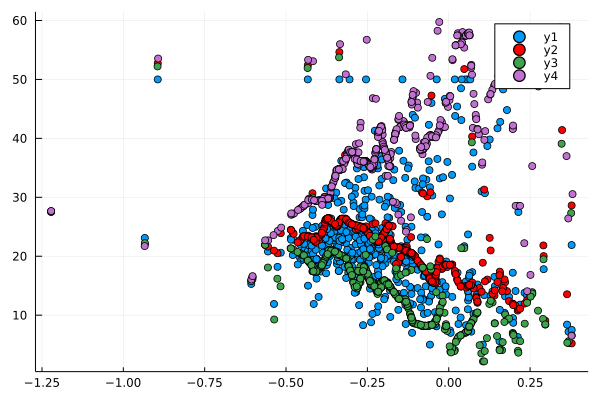

In [67]:
using Plots
model1 = qgplsim.model(X, Z, y, 0.5)
qgplsim.estimator(model1)
v1 = X * model1.alpha
yp1 = qgplsim.predict(model1, X, Z, 0)

model2 = qgplsim.model(X, Z, y, 0.1)
qgplsim.estimator(model2)
v2 = X * model2.alpha
yp2 = qgplsim.predict(model2, X, Z, 0)

model3 = qgplsim.model(X, Z, y, 0.9)
qgplsim.estimator(model3)
v3 = X * model3.alpha
yp3 = qgplsim.predict(model3, X, Z, 0)

scatter(v1, y)
scatter!(v1, yp1, color = "red")
scatter!(v2, yp2)
scatter!(v3, yp3)

In [17]:
model1.Z * model1.gamma

LoadError: MethodError: no method matching *(::Vector{Int64}, ::Vector{Float64})
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560
[0m  *([91m::StridedMatrix{T}[39m, ::StridedVector{S}) where {T<:Union{Float32, Float64, ComplexF32, ComplexF64}, S<:Real} at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.6/LinearAlgebra/src/matmul.jl:44
[0m  *(::StridedVecOrMat{T} where T, [91m::LinearAlgebra.Adjoint{var"#s832", var"#s831"} where {var"#s832", var"#s831"<:LinearAlgebra.LQPackedQ}[39m) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.6/LinearAlgebra/src/lq.jl:254
[0m  ...

In [23]:
model1.index[1]

35-element Vector{Int64}:
 143
 153
 155
 156
 161
 163
 164
 209
 210
 211
 212
 213
 217
   ⋮
 277
 278
 283
 284
 357
 358
 359
 364
 365
 370
 371
 373